# Girls Rock Data Science !

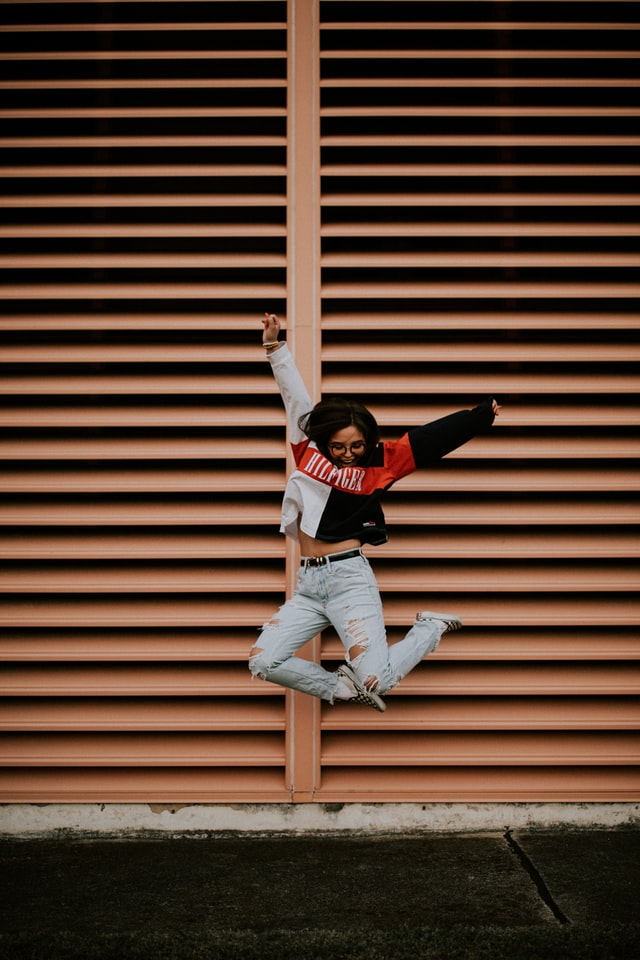
<span><center>Photo by <a href="https://unsplash.com/@hannahbusing?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Hannah Busing</a> on <a href="https://unsplash.com/?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></center></span>

For the 2020 edition of Kaggle's Data Science Survey, I'm going to show the world why girls totally rock this platform !

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
df = df.loc[df['Q3'] != 'In which country do you currently reside?']
df.replace({"Iran, Islamic Republic of...":'Iran', 
            "United States of America": 'USA', 
            "United Kingdom of Great Britain and Northern Ireland": 'UK',
            "Republic of Korea": 'Korea',
            "Some college/university study without earning a bachelor’s degree": 'Some college without degree'}, inplace=True)

Q2 is the gender question, that's the one we will focus on for analyzing the results.

In [ ]:
total_world_kagglers = df.shape[0]
print(f"In total, {total_world_kagglers} Kagglers answered the survey.")
df['Q2'].value_counts()

In [ ]:
total_female_kagglers = df['Q2'].value_counts()['Woman']

In [ ]:
df['Q2'].value_counts() / total_world_kagglers

Woah ! Less than one out of five Kaggle users reported in this survey identifies as a woman... There still seems to be enough respondents to convey a proper analysis though.

In [ ]:
df_men   = df.loc[df.Q2=='Man']
df_women = df.loc[df.Q2=='Woman']
df_other = df.loc[(df.Q2!='Woman')&(df.Q2!='Man')]

# Where are TechGirls mostly located ?

In [ ]:
cols = ['Country','Number Kagglers', '% Total World Kagglers', '% Girls Among National Kagglers', '% Total World Female Kagglers']
countries = pd.DataFrame(columns=cols)
for country in set(df['Q3'].values):
    temp  = df.loc[df['Q3']==country, ['Q2']]
    count_all, count_female = temp.shape[0], temp.loc[temp.Q2 == 'Woman'].shape[0]
    row = np.array([country, count_all, count_all / total_world_kagglers, count_female / count_all, count_female / total_female_kagglers]).reshape(1,5)
    countries = countries.append(pd.DataFrame(row, columns=cols), ignore_index=True)
countries = countries.set_index('Country', drop=True).astype('float64')
countries['Number Kagglers'] = countries['Number Kagglers'].astype('int')
countries.sample(5)

Let's dive in-depth in some descriptive statistics !

In [ ]:
countries.sort_values('Number Kagglers', ascending=False).head(5)

In [ ]:
fig = plt.figure(figsize=(22,10))
data_total = (countries.loc[countries['% Total World Kagglers']>0.01, ['% Total World Kagglers', '% Girls Among National Kagglers', '% Total World Female Kagglers']]*100).sort_values('% Total World Female Kagglers', ascending=False)
labels = data_total.index
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
y_total = data_total['% Total World Kagglers'].values
y_women = data_total['% Total World Female Kagglers'].values
ax = fig.add_subplot(2,1,1)
ax.bar(x-width, y_total, width, color='blue', label='% Total World Kagglers')
ax.bar(x, y_women, width, color='red', label='% Total World Female Kagglers')
ax.set_xlabel('Country')
ax.set_ylabel('% of Total')
ax.set_title('Repartition of Total Kagglers and Kaggle Girls across Countries that count at least 1% of Total Kagglers')
ax.set_xticks(x-0.5*width)
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
ax.legend()
ax2 = fig.add_subplot(2,1,2)
ax2.set_ylabel('% Girls Among National Kagglers')
ax2.set_xlabel('Country')
ax2.bar(x, data_total['% Girls Among National Kagglers'].values, width, color='green', label='% Girls Among National Kagglers')
# ax2.set_title('% Girls Among National Kagglers')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
plt.xticks(rotation=45)
ax2.legend()
plt.show()

Without any contest, the country hosting the most Kagglers seems to be India, which has more than twice as many respondents to the survey as the second-in-line country, the United States. Together they make 40% of the global Kaggle population ! 

We can also notice that *Other* comes third : I find this inspiring that a lot of "small" countries, not featured on the list, actually wheight on Kaggle. Data Science crosses borders :) it isn't a matter of where you live nor where you come from.

Well I'm French , so of course I want to take a look at France :

In [ ]:
countries.loc['France']

We had 330 French respondents, and among them 16% girls (including me !). That's not bad !

Now, I'm interested not only in countries that host the most Kagglers, but rather in those where the more girls code. Where are most Women of Kaggle located ?

Without any surprise, we can see that the countries with the most Kagglers, on top of them the US and India, also are those where the highest numbers of Kaggle girls live. That's not much of a surprise :

In [ ]:
countries.sort_values('% Total World Female Kagglers', ascending=False).head(5)

Actually the ranking only changes from 5th place, where UK beats Japan, and for a small percentage. 

Now, let's get serious : what are the countries where the girls have the most incentives to come to Data Science ?

In [ ]:
countries.sort_values('% Girls Among National Kagglers', ascending=False).head(5)

Now, that's something interesting ! I bet no one would have guessed that. In three countries, Malaysia, Tunisia and Iran, **more than a third of Kagglers are girls !** And guess who are the worse-performers on that ranking ?

In [ ]:
countries.sort_values('% Girls Among National Kagglers', ascending=True).head(5)

Hoho ! Well, in three countries, namely Japan, Korea and Chile, girls make up less than a tenth of the Kaggle population... I bet you wouldn't have guessed either :)

# Are TechGirls rather High-Educated or Self-Made-Women ?

In the Education question (Q4), the options were :

● No formal education past high school

● Some college/university study without earning a bachelor’s degree

● Bachelor’s degree

● Master’s degree

● Doctoral degree

● Professional degree

● I prefer not to answer

In [ ]:
((df_men['Q4'].value_counts()/df_men.shape[0])*100).round(1)

In [ ]:
((df_women['Q4'].value_counts()/total_female_kagglers)*100).round(1)

In [ ]:
fig = plt.figure(figsize=(20,10))
data_men = (df_men['Q4'].value_counts()/df_men.shape[0])*100
labels = data_men.index
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
y_men = data_men.values
y_women = ((df_women['Q4'].value_counts()/total_female_kagglers)*100)[labels].values
y_other = ((df_other['Q4'].value_counts()/df_other.shape[0])*100)[labels].values
ax = fig.add_subplot(1,1,1)
ax.bar(x-1.5*width, y_men, width, color='blue', label='Men')
ax.bar(x-0.5*width, y_women, width, color='red', label='Women')
ax.bar(x+0.5*width, y_other, width, color='green', label='Other')
ax.set_ylabel('% of Kagglers')
ax.set_xlabel('Degree Level')
ax.set_title('Scores by Degree and Gender')
ax.set_xticks(x-0.5*width)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

When looking at these results we can see that :
- First, the *structure* of education among Kagglers is the same between men and women (there are more Master's degree, then Bachelor's, the Doctoral, ...) ;
- Second, it *seems* that girls are higher educated : 41.5% of them have a master's degree against 38.8% of men, for example. That's not a huge gap though.

# How Experienced are TechGirls ?

Coming soon !


That's it for now, but that's a work in progress... Hope you enjoyed it, don't forget to upvote !